In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("hearing_test.csv")

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

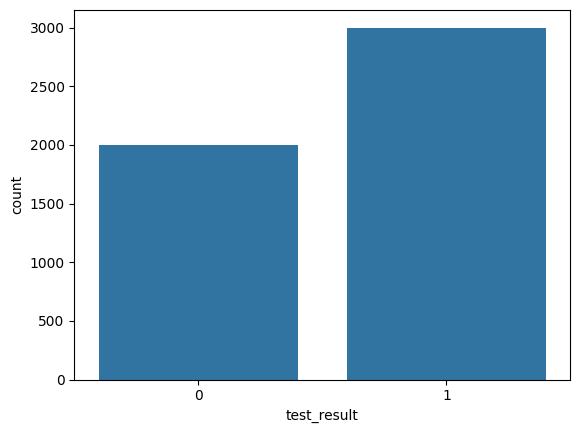

In [6]:
sns.countplot(data=df,x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

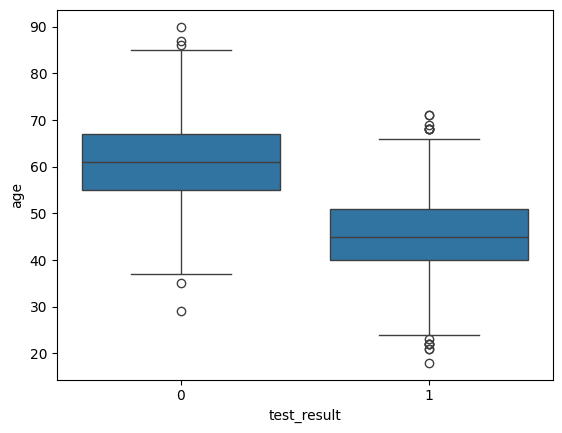

In [7]:
sns.boxplot(x='test_result',y='age',data=df)

<Axes: xlabel='age', ylabel='physical_score'>

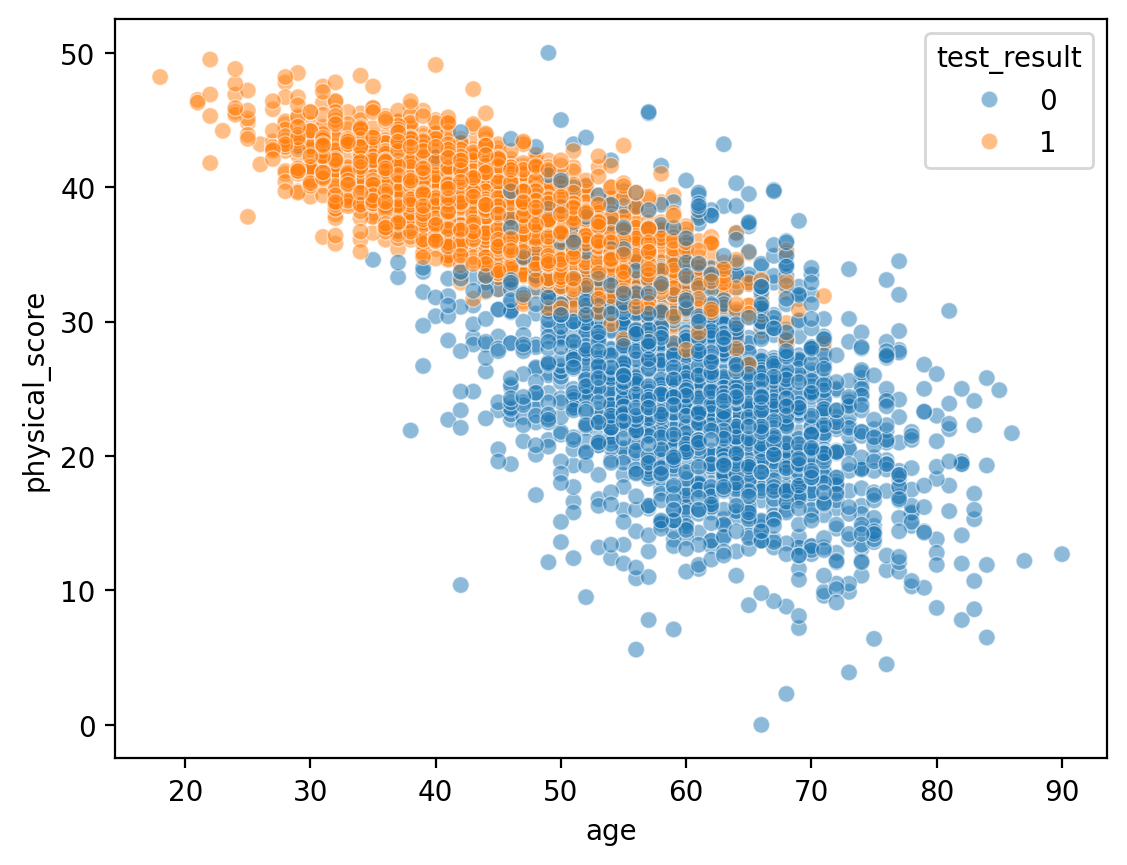

In [8]:
plt.figure(dpi=200)
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result',alpha=0.5)

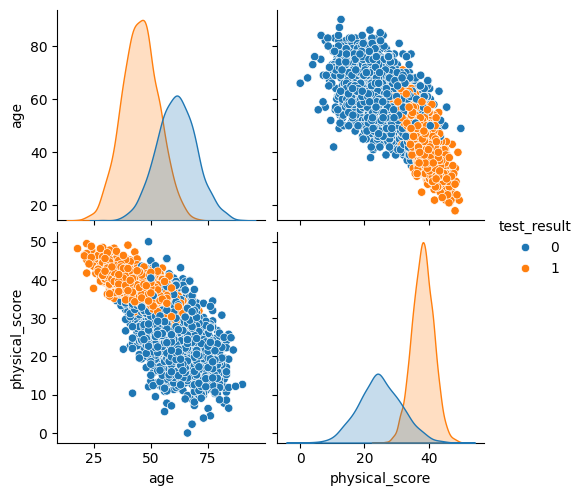

In [9]:
sns.pairplot(df,hue='test_result')

<Axes: >

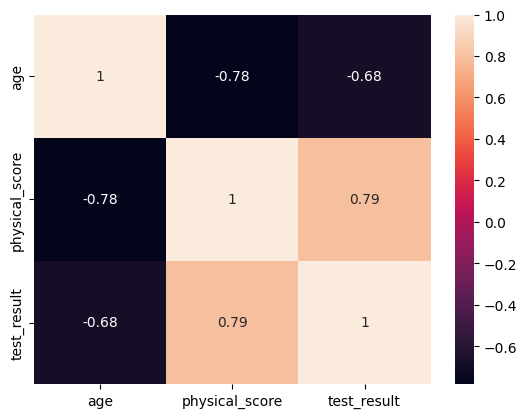

In [10]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

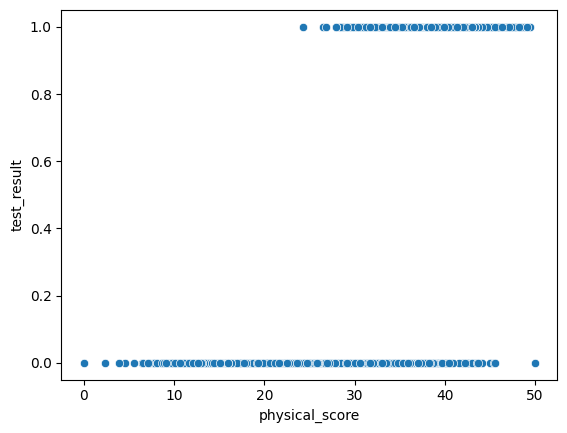

In [11]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

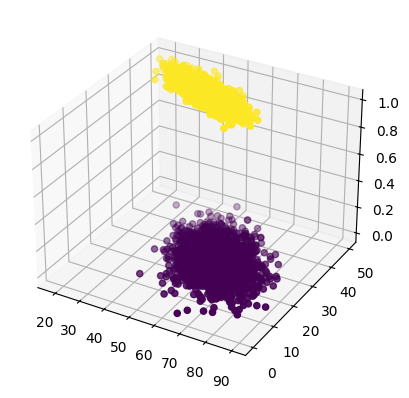

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

In [13]:
X = df.drop('test_result',axis=1)

In [14]:
y = df['test_result']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [18]:
scaler = StandardScaler()

In [19]:
scaled_X_train = scaler.fit_transform(X_train)

In [20]:
scaled_X_test = scaler.fit_transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log_model = LogisticRegression()

In [23]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [24]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [25]:
y_pred = log_model.predict_proba(scaled_X_test)

In [ ]:
#y_pred

In [27]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [30]:
y_pred = log_model.predict(scaled_X_test)

In [32]:
accuracy_score(y_test,y_pred)

0.924

In [33]:
confusion_matrix(y_test,y_pred)

array([[173,  20],
       [ 18, 289]])

In [38]:
#from sklearn.metrics import plot_confusion_matrix

In [39]:
#plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       193
           1       0.94      0.94      0.94       307

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



In [42]:
from sklearn.metrics import precision_score,recall_score

In [43]:
precision_score(y_test,y_pred)

0.9352750809061489

In [44]:
recall_score(y_test,y_pred)

0.9413680781758957